In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# membaca data
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [49]:
# menghilangkan kolom yang tidak diperlukan
data = data.drop(["Channel", "Region"], axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [50]:
array = data.values
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [51]:
# normalisasi data
from sklearn.preprocessing import StandardScaler
stsclr = StandardScaler().fit(array)
norm_data = stsclr.transform(array)

In [56]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.8, min_samples=6).fit(norm_data)
clusters = pd.DataFrame(model.labels_, columns=['clusters'])
clusters.value_counts()

clusters
 0          360
-1           80
dtype: int64

In [57]:
#-1 cluster represents outliers which means we have 80 datapts as outliers
final_data = pd.concat([clusters, data],axis=1)
final_data.groupby(final_data.clusters).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,
-1,1587057,1094324,1414544,519424,555680,300355
0,3693074,1456033,2084018,832226,712177,370588


Text(0.5, 1.0, ' DBSCAN clustering')

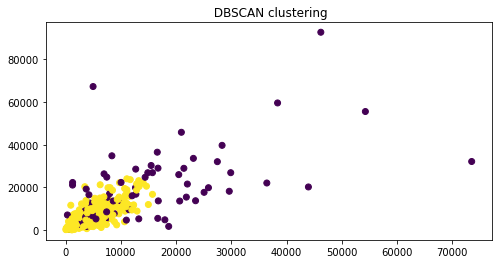

In [60]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
plt.scatter(final_data['Milk'], final_data['Grocery'], c=final_data.clusters, marker='o', alpha=1)
plt.title(' DBSCAN clustering')